# Sumo Wrestling Match Prediction

## Exploratory Data Analysis (3/5)

## Contents
- [Data Import](#Data-Import)
- [Feature Engineering](#Feature-Engineering)
    - Convert shusshin (hometown) to numeric values 
    - Calculate age
    - Add BMI calculation
    - Calculate height & weight differences between two sumo wrestlers 
    - Convert sumo wrestlers ranks with numeric values
    - Track rank changes 
    - Calculate winning percentage in the previous tournament
    - Calculate winning percentage in the current tournament and at a time of the game
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Tableau](#Tableau)

## Data Import

### Libraries

In [1]:
# Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import HTML

In [2]:
# Change the option to display with no max 
# Reference: (https://kakakakakku.hatenablog.com/entry/2021/04/19/090229)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Data Import

#### sumo_v2_clean.csv

In [3]:
# Read in the data
df = pd.read_csv('../data/sumo_v2_clean.csv')

# Review
df.head()

,basho,day,r1_id,r1_rank,r1_shikona,r1_result,r1_win,kimarite,r2_id,r2_rank,r2_shikona,r2_result,r1_heya,r1_shusshin,r1_birth_date,r1_height,r1_weight,r1_prev,r1_prev_w,r1_prev_l,r2_heya,r2_shusshin,r2_birth_date,r2_height,r2_weight,r2_prev,r2_prev_w,r2_prev_l
0,1983.01,1,4140,J13w,Chikubayama,0-1 (7-8),0,yorikiri,4306,Ms1e,Ofuji,1-0 (6-1),Miyagino,Fukuoka,1957-08-21,175.5,115.0,Ms4e,4.0,3.0,Kokonoe,Tokyo,1958-08-26,193.5,145.0,Ms4w,4.0,3.0
1,1983.01,3,1337,J12w,Tochitsukasa,1-2 (9-6),0,yorikiri,4306,Ms1e,Ofuji,2-0 (6-1),Kasugano,Aichi,1958-04-25,178.5,130.0,Ms5e,5.0,2.0,Kokonoe,Tokyo,1958-08-26,193.5,145.0,Ms4w,4.0,3.0
2,1983.01,15,4097,J12e,Tamakiyama,8-7,1,yorikiri,4306,Ms1e,Ofuji,6-1,Kataonami,Fukuoka,1951-04-29,182.0,134.0,Ms2w,5.0,2.0,Kokonoe,Tokyo,1958-08-26,193.5,145.0,Ms4w,4.0,3.0
3,1983.01,2,4140,J13w,Chikubayama,1-1 (7-8),1,oshidashi,4125,J7e,Shinko,0-2 (8-7),Miyagino,Fukuoka,1957-08-21,175.5,115.0,Ms4e,4.0,3.0,Isegahama,Yamagata,1950-01-02,188.0,134.0,M14w,3.0,12.0
4,1983.01,8,1337,J12w,Tochitsukasa,4-4 (9-6),1,oshidashi,4125,J7e,Shinko,4-4 (8-7),Kasugano,Aichi,1958-04-25,178.5,130.0,Ms5e,5.0,2.0,Isegahama,Yamagata,1950-01-02,188.0,134.0,M14w,3.0,12.0


In [4]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226588 entries, 0 to 226587
Data columns (total 28 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   basho          226588 non-null  float64
 1   day            226588 non-null  int64  
 2   r1_id          226588 non-null  int64  
 3   r1_rank        226588 non-null  object 
 4   r1_shikona     226588 non-null  object 
 5   r1_result      226588 non-null  object 
 6   r1_win         226588 non-null  int64  
 7   kimarite       226588 non-null  object 
 8   r2_id          226588 non-null  int64  
 9   r2_rank        226588 non-null  object 
 10  r2_shikona     226588 non-null  object 
 11  r2_result      226588 non-null  object 
 12  r1_heya        226588 non-null  object 
 13  r1_shusshin    226588 non-null  object 
 14  r1_birth_date  226588 non-null  object 
 15  r1_height      226588 non-null  float64
 16  r1_weight      226588 non-null  float64
 17  r1_prev        226588 non-nul

In [5]:
# Check data shape
df.shape

(226588, 28)

## Feature Engineering

### Convert shusshin (hometown) to numeric values

The shusshin column provides the sumo wrestler's hometown. This values are over 60 different categorical values in this column. In order to convert it to numeric values, a function called `japan_hometown` was created. This function takes a hometown and assigns a value of 1 if the hometown is located in any city in Japan. On the other had, if the hometown is outside Japan, the function assigns a value of 0. 

As a side note, I initially tried using each country name as a separate value in the analysis. However, this features demonstrated a low correlation with the target variable (`r1_win`) at r=+/-0.014. As a result, the calculation was updated to assign a binary value of either 0 or 1 to each wrestler's hometown. This change improved the correlation to r=+/-0.035.

|feature|correlation|
|--|--|
|r1_hometown_calc|0.014|
|r2_hometown_calc|-0.014|
|r1_Japan_hometown_calc|0.035|
|r2_Japan_hometown_calc|-0.035|

In [6]:
df['r1_shusshin'].unique()

array(['Fukuoka', 'Aichi', 'Gunma', 'Hyogo', 'Yamagata', 'Niigata',
       'Gifu', 'Hokkaido', 'Aomori', 'Okayama', 'Akita', 'Kanagawa',
       'Oita', 'Kagoshima', 'Miyagi', 'Tokyo', 'Chiba', 'Osaka', 'Fukui',
       'Saga', 'U.S.A.', 'Yamanashi', 'Ishikawa', 'Nagasaki', 'Miyazaki',
       'Ibaraki', 'Fukushima', 'Mie', 'Shiga', 'Kochi', 'Kyoto', 'Iwate',
       'Wakayama', 'Tokushima', 'Toyama', 'Kumamoto', 'Okinawa', 'Brazil',
       'Ehime', 'Shizuoka', 'Taiwan', 'Saitama', 'Western Samoa',
       'Hiroshima', 'Argentina', 'Nara', 'Tochigi', 'Kagawa', 'Mongolia',
       'Yamaguchi', 'Korea', 'Georgia', 'Russia', 'Bulgaria', 'Estonia',
       'China', 'Shimane', 'Czech', 'Egypt', 'Tottori', 'Nagano',
       'Kazakhstan'], dtype=object)

In [7]:
# Define a function 
def japan_hometown(shusshin):
    """ 
    Takes a shusshin (hometown) and 
    assigns a value of 1 if the hometown is any city in Japan 
    or assigns a value of 0 if the hometown is outside Japan
    """
    japan_cities = ['Fukuoka', 'Aichi', 'Gunma', 'Hyogo', 'Yamagata', 'Niigata',
             'Gifu', 'Hokkaido', 'Aomori', 'Okayama', 'Akita', 'Kanagawa',
             'Oita', 'Kagoshima', 'Miyagi', 'Tokyo', 'Chiba', 'Osaka', 
             'Fukui', 'Saga','Yamanashi', 'Ishikawa', 'Nagasaki', 'Miyazaki',
             'Ibaraki', 'Fukushima', 'Mie', 'Shiga', 'Kochi', 'Kyoto', 
             'Iwate', 'Wakayama', 'Tokushima', 'Toyama', 'Kumamoto', 
             'Okinawa', 'Ehime', 'Shizuoka', 'Saitama', 'Hiroshima', 'Nara', 
             'Tochigi', 'Kagawa', 'Yamaguchi', 'Shimane', 'Tottori', 'Nagano']

    if shusshin in japan_cities:
        return 1 # Japan
    else:
        return 0 # Outside Japan 

In [8]:
# Apply the function
df['r1_Japan_hometown_calc'] = df['r1_shusshin'].apply(japan_hometown)
df['r2_Japan_hometown_calc'] = df['r2_shusshin'].apply(japan_hometown)

### Calculate age 

`basho` and `birth_date` columns are used to calculate each sumo wrestler's age at the time of the tournament.This calculated age is saved in a separate column. 

In [9]:
# Convert the 'basho' column to a datetime
df['basho'] = df['basho'].astype(str)
df['basho'] = pd.to_datetime(df['basho'], format = '%Y.%m')

# Convert the 'birth_date' column to a datetime
df['r1_birth_date'] = pd.to_datetime(df['r1_birth_date'], format='%Y-%m-%d')
df['r2_birth_date'] = pd.to_datetime(df['r2_birth_date'], format='%Y-%m-%d')

In [10]:
# Define a function
def calculate_age(birthdate, basho):
    """
    Takes birthdate and basho and 
    calculates the age of a wrestler
    """
    age = basho.year - birthdate.year - ((basho.month, basho.day) < (birthdate.month, birthdate.day))
    return age

In [11]:
# Apply the function
df['r1_age_calc'] = df.apply(lambda x: calculate_age(x['r1_birth_date'], 
                                                     x['basho']), 
                             axis=1)
df['r2_age_calc'] = df.apply(lambda x: calculate_age(x['r2_birth_date'], 
                                                     x['basho']), 
                             axis=1)

### Add BMI calculation 

I initially tried calculating BMI and added separate columns. However, these features have very low correlation to target variable (`r1_win`) at r=+/-0.0028 and so dropped the column 

|feature|correlation|
|--|--|
|r1_bmi|0.0028|
|r2_bmi|-0.0028|

In [12]:
#df['r1_bmi'] = df['r1_weight'] / ((df['r1_height']/100)**2)
#df['r2_bmi'] = df['r2_weight'] / ((df['r2_height']/100)**2)

### Add height & weight in the US measurement (for EDA purpose only)

In [13]:
# Convert height and weight
df['r1_height_ft'] = round((df['r1_height'] * 0.393701) / 12, 1)
df['r2_height_ft'] = round((df['r2_height'] * 0.393701) / 12, 1)
df['r1_weight_lbs'] = round(df['r1_weight'] * 2.20462, 0)
df['r2_weight_lbs'] = round(df['r2_weight'] * 2.20462, 0)

In [14]:
# Difference 
df['height_diff_calc_drop'] = abs(df['r1_height_ft'] - df['r2_height_ft'])
df['weight_diff_calc_drop'] = abs(df['r1_weight_lbs'] - df['r2_weight_lbs'])
df['age_diff_calc_drop'] = abs(df['r1_age_calc'] - df['r2_age_calc'])

### Calculate height & weight differences between two sumo wrestlers

The `height` and `weight` columns for both rikishi1 and rikishi2 are used to calculate the differences in height and weight between the two sumo wrestlers. However, if we simply calculate the difference by subtracting rikishi2's height from rikishi1's height, some values may become negative when rikishi1 is shorter than rikishi2. To avoid negative values, a function was defined in such a way that assigns 50 as the baseline for no difference in height and 200 as the baseline for no difference in weight. These numbers were selected after checking the largest difference between two rikishi in the dataset. The largest difference for height was -34, and for weight, it was -185.5. These calculated height and weight differences are saved in separate columns. 

In [15]:
# Define a function
def height_diff_calc(r1, r2): 
    """
    Calculates the differences between rikishi 1 and rikishi 2's heights
    assigns 50 as the baseline for no differences in height to avoide negative values
    """
    if r1 - r2 > 0:
        return 50 + (r1 - r2)
    elif r1 - r2 == 0:
        return 50
    else: 
        return 50 + (r1 - r2)

In [16]:
# Define a function
def weight_diff_calc(r1, r2): 
    """
    Calculates the differences between rikishi 1 and rikishi 2's weights
    assigns 200 as the baseline for no differences in weight to avoide negative values
    """

    if r1 - r2 > 0:
        return 200 + (r1 - r2)
    elif r1 - r2 == 0:
        return 200
    else: 
        return 200 + (r1 - r2)

In [17]:
# Apply the function
df['height_diff_calc'] = df.apply(lambda x: height_diff_calc(x['r1_height'], 
                                                     x['r2_height']), 
                             axis=1)
df['weight_diff_calc'] = df.apply(lambda x: weight_diff_calc(x['r1_weight'], 
                                                     x['r2_weight']), 
                             axis=1)

### Convert sumo wrestlers ranks with numeric values

In this dataset, sumo wrestler's ranks are ranged from Makushita (Ms) to Yokozuna (Y), where Yokozuna is the highest rank in the tournament. The ranks are identified by a combination of letter (J, M, S, K, O, Y) and a number (from 1 - 17), with an optional letter of 'e' or 'w' to indicate whether the wrestler is in the East or West side of the banzuke (ranking chart). 

Here is the breakdown of the rank code in the list: 

|Code|Class|
|--|--|
|Y|Yokozuna|
|O|Ozeki|
|S|Sekiwake|
|K|Komusubi|
|M|Maegashira|
|J|Juryo|
|Ms|Makushita|

The number following the rank code indicates the wrestler's rank within their class, with a smaller number indicating a higher rank. For example, J1 is a higher rank than J2. 

The 'e' and 'w' letter indicate whether the wrestler is on the East or West side of the banzuke. For example, J1e 
is the East side wrestler at rank J1, while J1w is the West side wrestler at rank J1. 

Here are some references for the sumo rank
- Reference: https://www.sumo.or.jp/EnHonbashoBanzuke/index/
- Reference: https://en.wikipedia.org/wiki/Template:Sumo_rank

A function called `simple_rank` was defined to take a sumo wrestler's rank (codes) and extract the substring before the letter 'e' or 'w'. Although the east wrestler is typically of a higher rank than the west wrestler if they are in the same class, this was not taken into account for this project to simplify the function. Another function called `rank_to_num` was defined to convert the sumo wrestler's rank to a numeric value. A rank of 0 indicates no class/rank, and the higher the number, the higher the rank.

In [18]:
# Define a function
def simple_rank(codes):
    """ 
    Takes a sumo wrestler rank (codes) and 
    extracts the substring before the letter 'e' (East) or 'w' (West)
    """
    if 'e' in codes:
        return codes[:codes.index('e')]
    elif 'w' in codes:
        return codes[:codes.index('w')]

In [19]:
# Apply the function
df['r1_rank_simple_drop'] = df['r1_rank'].apply(simple_rank)
df['r2_rank_simple_drop'] = df['r2_rank'].apply(simple_rank)
df['r1_prev_drop'] = df['r1_prev'].apply(simple_rank)
df['r2_prev_drop'] = df['r2_prev'].apply(simple_rank)

In [20]:
# Check the number of ranks and the updated rank codes 
print(f"Number of ranks: {len(pd.concat([df['r1_rank_simple_drop'],df['r2_rank_simple_drop']]).unique())}")
print(f"Rank codes: {pd.concat([df['r1_rank_simple_drop'],df['r2_rank_simple_drop']]).unique()}")

Number of ranks: 52
Rank codes: ['J13' 'J12' 'J11' 'J10' 'J8' 'J6' 'J5' 'J3' 'J4' 'J2' 'J1' 'J9' 'J7'
 'M14' 'Ms2' 'Ms3' 'Ms4' 'Ms1' 'M13' 'M12' 'M9' 'M8' 'M6' 'M11' 'M10' 'M7'
 'M4' 'M2' 'M1' 'M5' 'S1' 'M3' 'O2' 'O1' 'K1' 'Y1' 'Y2' 'Ms6' 'Ms5' 'Ms7'
 'Ms8' 'Ms10' 'O3' 'Ms14' 'Ms9' 'S2' 'M15' 'M16' 'K2' 'J14' 'M17' 'M18']


In [21]:
# Define a function
def rank_to_num(rank):  
    """
    Converts sumo wrestler rank to a numeric value.
    """
    if rank is None: 
        return 0 #(0)
    
    try:
        rank_num = int(rank[1:])
    except ValueError:
        rank_class1 = rank[0:2]
        rank_num1 = int(rank[2:]) 
        
        if rank_class1 == 'Ms':   # Makushita (7)
            return 0 + rank_num1
        else: 
            return 0 #(0)

    rank_class = rank[0]

    if rank_class == 'J': # Juryo (6)
        return 20 + rank_num
    elif rank_class == 'M': # Maegashira (5)
        return 40 + rank_num
    elif rank_class == 'K': # Komusubi (4)
        return 50 + rank_num
    elif rank_class == 'S': # Sekiwake (3)
        return 60 + rank_num
    elif rank_class == 'O': # Ozeki (2)
        return 70 + rank_num
    elif rank_class == 'Y': # Yokozune (1)
        return 80 + rank_num
    else:     
        return 0 # invalid rank class (0)

In [22]:
# Apply the function
df['r1_rank_curr_calc'] = df['r1_rank_simple_drop'].apply(rank_to_num)
df['r2_rank_curr_calc'] = df['r2_rank_simple_drop'].apply(rank_to_num)
df['r1_rank_prev_calc'] = df['r1_prev_drop'].apply(rank_to_num)
df['r2_rank_prev_calc'] = df['r2_prev_drop'].apply(rank_to_num)

### Track rank changes

The dataset includes information on the `current` and `previous rank` of sumo wrestlers. A function `track_rank_changes` has been defined to determine whether a wrestler has been promoted or demoted based on their current and previous ranks. If the wrestler has been promoted, a value of 2 is assigned. If they have remained in the same rank, a value of 1 is assigned. If they have been demoted, a value of 0 is assigned. The resulting values are saved in new columns. 

In [23]:
def track_rank_changes(curr, prev):
    """
    Takes the previous and current ranks and  
    assigns a value of 2, if the sumo wrestler has been promoted from previous rank
    assigns a value of 1, if he has been in the same rank or
    assigns a value of 0, if he has been demoted
    """
    if curr > prev:
        return 2 # 2 = promoted
    elif curr == prev:
        return 1 # 1 = same
    else:
        return 0 # 0 = demoted

In [24]:
# Apply the function
df['r1_rank_changes_calc'] = df.apply(lambda x: track_rank_changes(x['r1_rank_curr_calc'], 
                                                           x['r1_rank_prev_calc']), 
                                   axis=1)
df['r2_rank_changes_calc'] = df.apply(lambda x: track_rank_changes(x['r2_rank_curr_calc'], 
                                                           x['r2_rank_prev_calc']), 
                                   axis=1)

### Calculate winning percentage in the previous tournament

The dataset provides the number of wins and losses from previous tournaments. A function was created to take the number of wins and losses and calculate the winning percentage of the tournament. The calculated values are saved in new columns. 

In [25]:
# Define a function 
def win_percentage(win, loss): 
    """
    Takes the number of wins and losses and 
    calculate the winning percentage of the tournament
    """
    total_games = win + loss
    if total_games == 0: 
        return 0
    else:
        win_pct = win / total_games
        return win_pct

In [26]:
# Apply the function
df['r1_prev_win_pct_calc'] = df.apply(lambda x: win_percentage(x['r1_prev_w'],
                                                               x['r1_prev_l']), 
                                      axis=1)
df['r2_prev_win_pct_calc'] = df.apply(lambda x: win_percentage(x['r2_prev_w'], 
                                                               x['r2_prev_l']), 
                                      axis=1)

### Calculate winning percentage in the current tournament and at the time of the game

The `result` columns (for both r1 and r2) provide the number of wins and losses for each sumo wrestler at the time of the game. Additionally, the numbers in parentheses provide the total number of wins and losses for the current tournament. The column is split into two to track these two different pieces of information.

Then, a function is defined to calculate the winning percentage of the current tournament and at the time of the current tournament, given the number of wins and losses for each wrestler. These calculated values are then saved in separate columns for each wrestler.

In [27]:
# Split `rikishi_result` columns into two columns `result` and `result_all` for both 
# `rikishi1` and `rikishi2` by using `str.extract()`
# Reference: https://stackoverflow.com/questions/36028932/how-to-extract-specific-content-in-a-pandas-dataframe-with-a-regex

# Extract the result1 and result1_all columns using regular expressions
df[['r1_result', 'r1_result_all']] = df['r1_result'].str.extract(r'^(\d+-\d+)\s\((\d+-\d+)\)$')
df[['r2_result', 'r2_result_all']] = df['r2_result'].str.extract(r'^(\d+-\d+)\s\((\d+-\d+)\)$')

In [28]:
# Define a function 
def win_percentage_2(result): 
    """
    Takes the number of wins and losses and 
    calculate the winning percentage of the tournament
    """
    if pd.isna(result): 
        return 0 
    else: 
        win, loss = result.split('-')
        win = int(win)
        loss = int(loss)
        total_games = win + loss 
        if total_games == 0: 
            return 0
        else:
            win_pct = win / total_games
            return win_pct

In [29]:
# Apply the function
df['r1_curr_win_pct_calc'] = df['r1_result_all'].apply(win_percentage_2)
df['r2_curr_win_pct_calc'] = df['r2_result_all'].apply(win_percentage_2)
df['r1_now_win_pct_calc'] = df['r1_result'].apply(win_percentage_2)
df['r2_now_win_pct_calc'] = df['r2_result'].apply(win_percentage_2)

In [30]:
# Add win and lose numbers 
df[['r1_now_w_calc', 'r1_now_l_calc']] = df['r1_result'].str.split('-', expand=True)
df[['r2_now_w_calc', 'r2_now_l_calc']] = df['r2_result'].str.split('-', expand=True)
df[['r1_curr_w_calc', 'r1_curr_l_calc']] = df['r1_result_all'].str.split('-', expand=True)
df[['r2_curr_w_calc', 'r2_curr_l_calc']] = df['r2_result_all'].str.split('-', expand=True)

In [31]:
# Fill any missing values in these four columns with 0
df.fillna(0, inplace=True)

### Divide heya by East or West side location

In professional sumo, the heya (training stables) are divided into two groups: the East and the West. The dividing line between the two groups is the city of Nagoya, with heya to the east of Nagoya being part of the East group, and those to the west being part of the West group. 

Here is the list of heya and which side they belong to:

|East|West|
|--|--|
|Miyagino|	Kokonoe|
|Kasugano|	Hanakago|
|Kataonami|	Takasago|
|Taiho|	Tomozuna|
|Tokitsukaze|	Tatsutagawa|
|Kagamiyama|	Isenoumi|
|Kise|	Michinoku|
|Futagoyama|	Asahiyama|
|Sadogatake|	Takadagawa|
|Hanaregoma|	Kasugayama|
|Dewanoumi|	Fujishima|
|Oshima|	Azumazeki|
|Isegahama|	Kitanoumi|
|Onaruto|	Minato|
|Izutsu|	Musashigawa|
|Kumagatani|	Ajigawa|
|Mihogaseki|	Tamanoi|
|Oshiogawa|	Magaki|
|Tatsunami|	Naruto|
|Nishonoseki|Wakamatsu|
||Irumagawa|
||Nakamura|
||Hakkaku|
||Oitekaze|
||Matsugane|
||Oguruma|
||Onomatsu|
||Nakadachi|
||Sakaigawa|
||Otake|
||Takanohana|
||Hatachiyama|
||Shikoroyama|
||Onoe|
||Chiganoura|
||Arashio|
||Shibatayama|
||Kiriyama|
||Shikihide|
||Tagonoura|
||Minezaki|
||Yamahibiki|
||Nishikido|
||Asakayama|
||Tokiwayama||

A function was defined to take a values in `heya` column and returns a value of 1 if the heya is located in the East side and returns a value of 0 if the heya is located in the West side. 

In [32]:
# Define a function 
def heya_location(heya):
    """
    Takes `heya` and 
    returns a value of 1 if the heya is located in the East side and  
    returns a value of 0 if the heya is located in the West side
    """
    east_group = ['Miyagino', 'Kasugano', 'Kataonami', 
                  'Taiho', 'Tokitsukaze', 'Kagamiyama', 
                  'Kise', 'Futagoyama', 'Sadogatake', 
                  'Hanaregoma', 'Dewanoumi', 'Oshima', 
                  'Isegahama', 'Onaruto', 'Izutsu', 'Kumagatani', 
                  'Mihogaseki', 'Oshiogawa', 'Tatsunami', 'Nishonoseki']
    west_group = ['Kokonoe', 'Hanakago', 'Takasago', 'Tomozuna', 
                  'Tatsutagawa', 'Isenoumi', 'Michinoku', 'Asahiyama', 
                  'Takadagawa', 'Kasugayama', 'Fujishima', 'Azumazeki', 
                  'Kitanoumi', 'Minato', 'Musashigawa', 'Ajigawa', 
                  'Tamanoi', 'Magaki', 'Naruto', 'Wakamatsu', 'Irumagawa', 
                  'Nakamura', 'Hakkaku', 'Oitekaze', 'Matsugane', 
                  'Oguruma', 'Onomatsu', 'Nakadachi', 'Sakaigawa', 
                  'Otake', 'Takanohana', 'Hatachiyama', 'Shikoroyama', 
                  'Onoe', 'Chiganoura', 'Arashio', 'Shibatayama', 
                  'Kiriyama', 'Shikihide', 'Tagonoura', 'Minezaki', 
                  'Yamahibiki', 'Nishikido', 'Asakayama', 'Tokiwayama']
  
    if heya in east_group:
        return 1
    else: 
        return 0

In [33]:
# Apply the function 
df['r1_heya_calc'] = df['r1_heya'].apply(heya_location)
df['r2_heya_calc'] = df['r2_heya'].apply(heya_location)

### Divide `kimarite` into groups based on their characteristics

The sumo kimarite can be divided into several groups based on their characteristics. Here are some common groupings : 
- Throws (nage-waza): These techniques involve throwing the opponent to the ground or out of the ring. Examples include uwatenage, sukuinage, kotenage, yoritaoshi, and kubinage.
- Pushing techniques (oshi-waza): These techniques involve using brute force to push the opponent out of the ring. Examples include oshidashi, tsukidashi, and okuridashi.
- Pulling techniques (hiki-waza): These techniques involve pulling the opponent off balance and then taking them down. Examples include hikiotoshi and tsuridashi.
- Twisting techniques (kime-waza): These techniques involve twisting the opponent's body in such a way as to cause them to lose balance and fall. Examples include shitatenage, katasukashi, and kainahineri.
- Miscellaneous techniques: These include techniques that don't fit neatly into the above categories. Examples include fusen (win by forfeit), hansoku (disqualification), and yobimodoshi (rematch).
Note that some kimarite can belong to multiple categories depending on their execution and outcome. 

|nage-waza(throwing)|oshi-waza(pushing)|hiki-waza(pulling)|kime-waza(immobilize or control the opponent)|others techniques|
|--|--|--|--|--|
|yorikiri|	oshidashi|	hikiotoshi|	katasukashi|	tsuridashi|
|uwatenage|	tsukidashi|	shitatenage|	kotenage|	tsukiotoshi|
|sukuinage|	okuridashi|	hatakikomi|	yoritaoshi|	isamiashi|
|uwatedashinage|	kimedashi|	kekaeshi|	uwatehineri|	utchari|
|oshitaoshi|	komatasukui|	tottari|	kubinage|	sotogake|
|abisetaoshi|	kawazugake|	shitatedashinage|	uchimuso|	watashikomi|
|harimanage|	uchigake|	kainahineri|	fusen|	sabaori|
|makiotoshi|	kirikaeshi|	shitatehineri|	tsukitaoshi|	ketaguri|
|okuritaoshi|	sotokomata|	yobimodoshi|	hikkake|	susoharai|
|nichonage|	ipponzeoi|	ashitori|	sakatottari|	tsuriotoshi|
|gasshohineri|	chongake|	izori|	sotomuso|	zubuneri|
|hansoku|	mitokorozeme|	waridashi|	susotori|	kubihineri|
|nimaigeri|	tsumatori|	sokubiotoshi|	tsukite|	okuritsuriotoshi|
|koshikudake|	okurihikiotoshi|	koshinage|	okurinage|	kotehineri|
|okuritsuridashi|	tasukizori|	okurigake|	ushiromotare|	tsutaezori|
|tokkurinage|	amiuchi|--|--|--|

A function was defined to take a value in `kimarite` column and returns a value based on the categorization (nage_waza, oshi_waza, hiki_waza, kime_waza and others 

In [34]:
# Define a function 
def kimarite_category(kimarite):
    """
    Takes `kimarite` and 
    returns a value based on the categorization
    """
    nage_waza = ['yorikiri', 'oshidashi', 'tsukidashi', 
                 'tsukiotoshi', 'okuridashi', 'hatakikomi', 
                 'kakenage', 'uwatenage', 'watashikomi', 
                 'uwatedashinage', 'sotokomata', 'okuritsuridashi', 
                 'kubinage', 'tsuridashi', 'wakigatame', 'yoritaoshi', 
                 'koshinage', 'katahajime']
    oshi_waza = ['tsukihiza', 'tsuppari', 'oshi-dashi', 'oshitaoshi', 
                 'kotehineri', 'okuritsuriotoshi', 'hikiotoshi', 
                 'okurinage', 'tsukihiza', 'sokubiotoshi', 'tsukite', 
                 'sotogake', 'uwatehineri', 'kainahineri', 'shitatehineri', 
                 'tokkurinage', 'okuritaoshi', 'shumokuzori', 'hansoku']
    hiki_waza = ['isamiashi', 'komatasukui', 'kirikaeshi', 'uchimuso', 
                 'tsukitaoshi', 'fumidashi', 'ketaguri', 'tottari', 
                 'mitokorozeme', 'koshikudake', 'kotenage', 'tawara-gaeshi', 
                 'hikiwake', 'sotomuso', 'sotomawashi', 'okuritsurigane',
                 'tsuriotoshi', 'shumokuzori']
    kime_waza = ['koshinage', 'kime-dashi', 'kata-sukashi', 'kubi-hineri', 
                 'kata-ha-jime', 'katasukashi', 'uchihisagihineri', 
                 'ashi-garami', 'yaguranage', 'okurigake', 'sabaori', 
                 'kubihineri', 'sakatottari', 'ashitori', 'gasshohineri', 
                 'utsurigake']
    
    if pd.isna(kimarite):  
        return 0 
    elif kimarite in nage_waza: 
        return 5 
    elif kimarite in oshi_waza:
        return 4
    elif kimarite in hiki_waza:
        return 3
    elif kimarite in kime_waza:
        return 2
    else:
        return 1

In [35]:
# Apply the function 
df['kimarite_calc'] = df['kimarite'].apply(kimarite_category)

In [36]:
# Check data shape after feature engineering
df.shape

(226588, 70)

## Exploratory Data Analysis

#### Summary Statistics

In [37]:
# Summary statistics
df.describe()

,day,r1_id,r1_win,r2_id,r1_height,r1_weight,r1_prev_w,r1_prev_l,r2_height,r2_weight,r2_prev_w,r2_prev_l,r1_Japan_hometown_calc,r2_Japan_hometown_calc,r1_age_calc,r2_age_calc,r1_height_ft,r2_height_ft,r1_weight_lbs,r2_weight_lbs,height_diff_calc_drop,weight_diff_calc_drop,age_diff_calc_drop,height_diff_calc,weight_diff_calc,r1_rank_curr_calc,r2_rank_curr_calc,r1_rank_prev_calc,r2_rank_prev_calc,r1_rank_changes_calc,r2_rank_changes_calc,r1_prev_win_pct_calc,r2_prev_win_pct_calc,r1_curr_win_pct_calc,r2_curr_win_pct_calc,r1_now_win_pct_calc,r2_now_win_pct_calc,r1_heya_calc,r2_heya_calc,kimarite_calc
count,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000,226588.000000
mean,7.975859,2933.301358,0.500000,2933.301358,183.941763,148.912844,7.279300,6.786785,183.941763,148.912844,7.279300,6.786785,0.846638,0.846638,27.497379,27.497379,6.034911,6.034911,328.303414,328.303414,0.210224,50.759458,4.327202,50.000000,200.000000,42.224593,42.224593,40.493393,40.493393,1.044702,1.044702,0.513420,0.513420,0.453695,0.453695,0.454105,0.454105,0.520341,0.520341,4.505402
std,4.330891,3904.451169,0.500001,3904.451169,5.696507,22.442386,2.551998,2.701980,5.696507,22.442386,2.551998,2.701980,0.360337,0.360337,3.905725,3.905725,0.191971,0.191971,49.466724,49.466724,0.167516,44.189677,3.279047,7.975608,30.530278,15.228561,15.228561,17.317760,17.317760,0.943126,0.943126,0.174188,0.174188,0.211483,0.211483,0.289087,0.289087,0.499587,0.499587,1.145522
min,1.000000,1.000000,0.000000,1.000000,165.000000,81.000000,0.000000,0.000000,165.000000,81.000000,0.000000,0.000000,0.000000,0.000000,17.000000,17.000000,5.400000,5.400000,179.000000,179.000000,0.000000,0.000000,0.000000,16.000000,14.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.000000,63.000000,0.000000,63.000000,180.000000,135.000000,6.000000,5.000000,180.000000,135.000000,6.000000,5.000000,1.000000,1.000000,25.000000,25.000000,5.900000,5.900000,298.000000,298.000000,0.100000,19.000000,2.000000,45.000000,182.000000,29.000000,29.000000,27.000000,27.000000,0.000000,0.000000,0.400000,0.400000,0.333333,0.333333,0.250000,0.250000,0.000000,0.000000,5.000000
50%,8.000000,1290.000000,0.500000,1290.000000,184.000000,147.800000,8.000000,7.000000,184.000000,147.800000,8.000000,7.000000,1.000000,1.000000,27.000000,27.000000,6.000000,6.000000,326.000000,326.000000,0.200000,40.000000,4.000000,50.000000,200.000000,44.000000,44.000000,44.000000,44.000000,1.000000,1.000000,0.533333,0.533333,0.466667,0.466667,0.500000,0.500000,1.000000,1.000000,5.000000
75%,12.000000,4319.000000,1.000000,4319.000000,188.000000,161.000000,9.000000,9.000000,188.000000,161.000000,9.000000,9.000000,1.000000,1.000000,30.000000,30.000000,6.200000,6.200000,355.000000,355.000000,0.300000,70.000000,6.000000,55.000000,218.000000,51.000000,51.000000,51.000000,51.000000,2.000000,2.000000,0.600000,0.600000,0.600000,0.600000,0.642857,0.642857,1.000000,1.000000,5.000000
max,16.000000,12721.000000,1.000000,12721.000000,204.000000,285.000000,15.000000,15.000000,204.000000,285.000000,15.000000,15.000000,1.000000,1.000000,40.000000,40.000000,6.700000,6.700000,628.000000,628.000000,1.200000,409.000000,20.000000,84.000000,385.500000,82.000000,82.000000,82.000000,82.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


#### Correlation between dependent variables and match outcome

A heatmap was created to explore any potential correlations between the available variables and the outcome of the matches. Initially, the feature that exhibited the highest correlation with the match outcome was `r1_prev_l` and `r2_prev_l` at -0.036 and 0.036, respectively. However, through a process of feature engineering, several interaction columns were created, leading to the development of new features such as `r1_now_win_pct_calc` and `r2_now_win_pct_calc`, which demonstrate a correlation of 0.42/-0.42 with the match outcome. This indicates that these newly engineered features may have a stronger relationship with the outcome of the matches than the original features in the dataset.

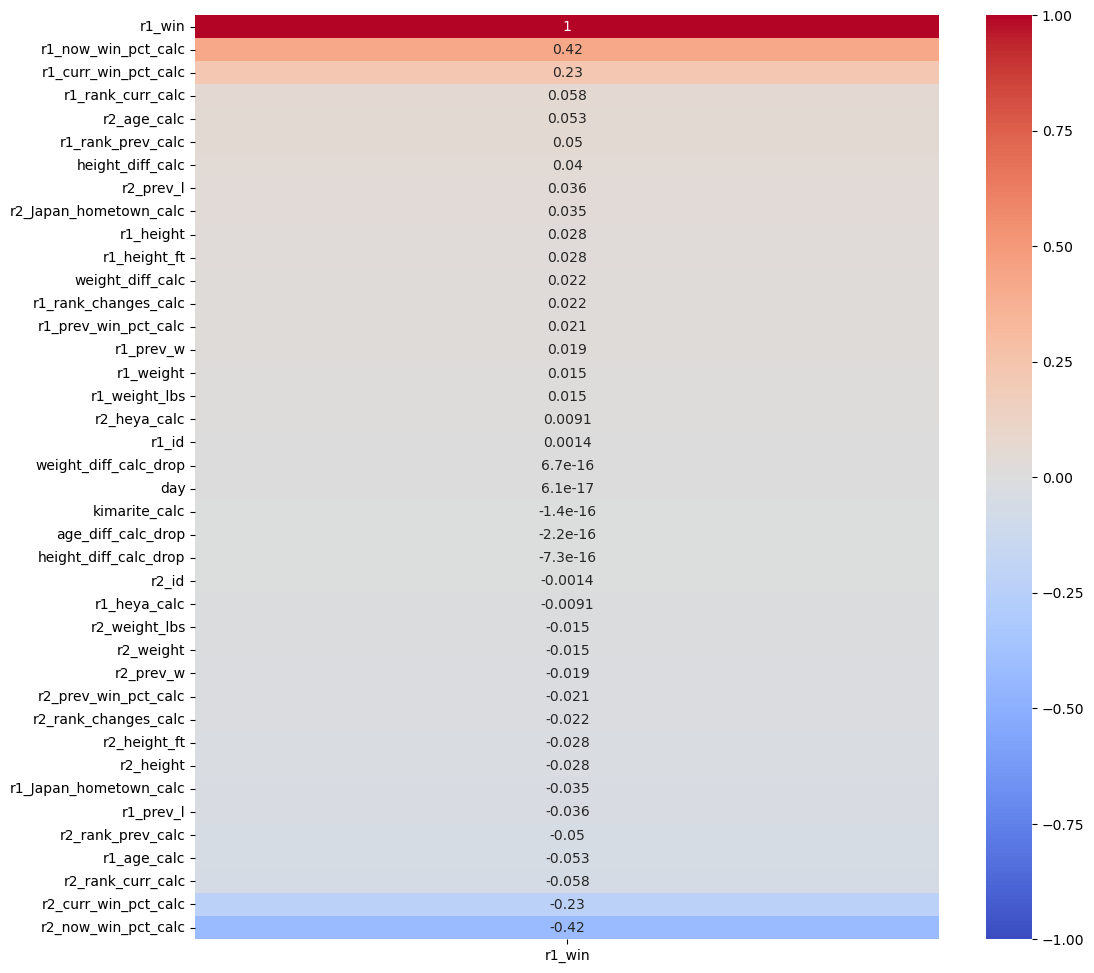

In [38]:
# Create a correlation dataset
corr = df.corr()[['r1_win']].sort_values(by='r1_win', ascending=False)

# Size
plt.figure(figsize =(12, 12))

# Plot 
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, cmap='coolwarm');

## Tableau

Additional visualizations are created in Tableau and embeded into Jupyter notebook.

Here is the [link](https://ateleron.medium.com/tableau-public-integration-with-jupyter-notebook-569e8787fe7e) that explains how to add Tableau visualizations into Jupyter notebook

In [39]:
%%HTML
<div class='tableauPlaceholder' id='viz1681400580069' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;GA&#47;GA_DSI_123_capstone_sumo&#47;D_Match_Outcome_vs_Body_Type&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='GA_DSI_123_capstone_sumo&#47;D_Match_Outcome_vs_Body_Type' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;GA&#47;GA_DSI_123_capstone_sumo&#47;D_Match_Outcome_vs_Body_Type&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1681400580069');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='986px';vizElement.style.height='850px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='986px';vizElement.style.height='850px';} else { vizElement.style.minWidth='986px';vizElement.style.maxWidth='100%';vizElement.style.height='850px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>


The above tableau include various dashboards and charts. 

|Tab Name|Info|
|--|--|
|D_Prediction_Height_weight|This dashboard contains two scatter charts that display match win probabilities based on wrestler's height and weight.|
|D_Prediction_Demographics|This dashboard contains two bar charts that display match win probabilities based on wrestler's age and home country.|
|D_Prediction_Ranks|This dashboard includes two bar charts that display match win probabilities based on wrestler's rank in the previous and current tournament.|
|D_Prediction_Num_Wins|This dashboard includes two bar charts that display match win probabilities based on the number of wins in the previous and current tournament.|
D_Tournament_Info|This dashboard provides sumo wrestling information, focusing on a particular tournament selected by the user. It includes a top 10 ranking of sumo wrestler in a selected tournament as well as other charts that display key demographics and characteristics of the wrestlers, including age, hometown, sumo ranks, weight and height.|
|D_Sumo_Wrestler_Info|This dashboard is designed to display information about a specific sumo wrestler selected by the user. The dashboard includes a bar chart that shows the number of different types of kimarite (sumo techniques) that the wrestler used to win matches in a tournament. Also, it has a line chart that displays the cumulative wins in a tournament period. Additionally, the dashboard displays the wrestler's profile such as his rank, age and height & weight.|
|D_Match_Outcome_vs_Body_Type|The scatter plot in this dashboard shows any correlation between match outcomes and body types. The X-axis represents the height in feet, and the Y-axis represents the weight in pounds of the sumo wrestlers. The dot line in the chart is a trend line that displays the relationship between the height and weight values. Additionally, the size of each circle and its color represent the number of wins by the sumo wrestler in a tournament.|


|Chart Name|Info|
|--|--|
|Hometown|This bar chart displays the breakdown of hometown by the sumo wrestlers who participated in a selected tournament.|
|Age|This histogram displays the number of sumo wrestlers across different ages. The histogram is color-coded to represent each wrestler's rank. This chart is used for D_Tournament_Info dashboard.|
|Height_and_Weight|This scatter plot displays the correlation between height and weight. The chart is color-coded to represent each wrestler's rank. This chart is used for D_Tournament_Info dashboard.|
|Sumo_Ranks|This bar chart represents the breakdown of sumo ranks by wrestlers who participated in a selected tournament. This chart is used for D_Tournament_Info dashboard.|
|Number_Of_Wins|This bar chart represents the top 10 sumo wrestlers in a selected tournament. The chart is color-coded to represent each wrestler's rank. This chart is used for D_Tournament_Info dashboard.|
|Kimarite|This bar chart represents the breakdown of Kimarite used by the selected sumo wrestlers. This chart is used for D_Tournament_Info dashboard.|
|Cumulative_Wins|This line chart displays the cumulative wins of a selected sumo wrestler in a tournament. The chart is color-coded with green indicating wins and red indicating losses for the sumo wrestler. This chart is used for D_Sumo_Wrestler_Info dashboard.|
|Sumo_Ranks_2|This packed bubble chart represents the breakdown of sumo ranks by wrestlers who participated in a selected tournament. This chart is used for D_Sumo_Wrestler_Info dashboard.|
|Age_2|This histogram displays the number of sumo wrestlers across different ages. The histogram is color-coded to represent each wrestler's rank. This chart is used for D_Sumo_Wrestler_Info dashboard.|
|Height_and_Weight_2|This scatter plot displays the correlation between height and weight. The chart is color-coded to represent each wrestler's rank. This chart is used for D_Sumo_Wrestler_Info dashboard.|
|Body_Shape_vs_Match_Outcome|The scatter plot shows any correlation between match outcomes and body types. The X-axis represents the height in feet, and the Y-axis represents the weight in pounds of the sumo wrestlers. The dot line in the chart is a trend line that displays the relationship between the height and weight values. Additionally, the size of each circle and its color represent the number of wins by the sumo wrestler in a tournament. This chart is used for D_Match_Outcome_vs_Body_Type dashboard.|
|Win_vs_Height|This scatter plot displays match win probabilities based on wrestler's height. This chart is used for D_Prediction_Height_weight dashboard.|
|Win_vs_Weight|This scatter plot displays match win probabilities based on wrestler's weight. This chart is used for D_Prediction_Height_weight dashboard.|
|Win_vs_Age|This bar charts displays match win probabilities based on wrestler's age. This chart is used for D_Prediction_Demographics dashboard.|
|Win_vs_Hometown|This bar charts displays match win probabilities based on wrestler's home country. This chart is used for D_Prediction_Demographics dashboard.|
|Win_vs_Prev|This bar chart displays match win probabilities based on wrestler's rank in the previous tournament. This chart is used for D_Prediction_Ranks dashboard.|
|Win_vs_Curr|This bar chart displays match win probabilities based on wrestler's rank in the current tournament. This chart is used for D_Prediction_Ranks dashboard.|
|Win_vs_Prev_W|This bar chart displays match win probabilities based on the number of wins in the previous tournament. This chart is used for D_Prediction_Num_Wins dashboard.|
|Win_vs_curr_W|This bar chart displays match win probabilities based on the number of wins in the current tournament. This chart is used for D_Prediction_Num_Wins dashboard.|

Here are a few highlights from the Tableau dashboards: 

#### Match Win Analysis Dashboard By Wrestler Body Measurement 

This dashboard contains two scatter charts displaying match win probabilities based on the wrestler's height and weight. The X-axis represents the wrestler's height and weight, while the Y-axis represents the match win probabilities. The dotted lines are trend lines showing the correlation between the two variables, and as shown below image, the trend lines show a positive relationship, but the correlation is very weak. Additionally, it appears that the trend line for height is slightly steeper than that of weight. Although there may be some correlation between height and weight, they do not seem to be strong predictors of match outcomes.

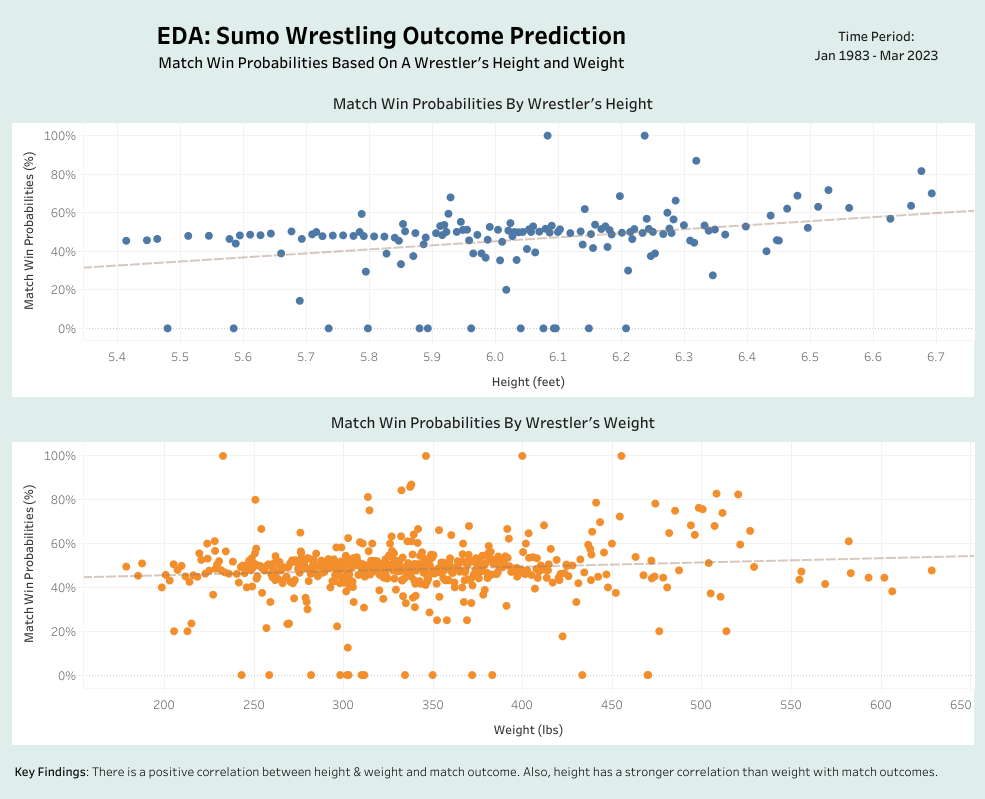

#### Correlation between match outcome and height and weight

Additionally, two boxplots were created to explore any possible correlation between the variables of height and weight differences between two sumo wrestlers and the outcome of their matches. Each boxplot displays two sets of data, comparing the variables of interest for the win and loss of the matches.

Based on the observations, the two boxplots in each chart show almost identical patterns, indicating that there is very little correlation between the variables of height and weight differences and the outcome of the matches. In other words, there doesn't appear to be any clear relationship between the differences in these variables and the likelihood of winning or losing a sumo wrestling match.

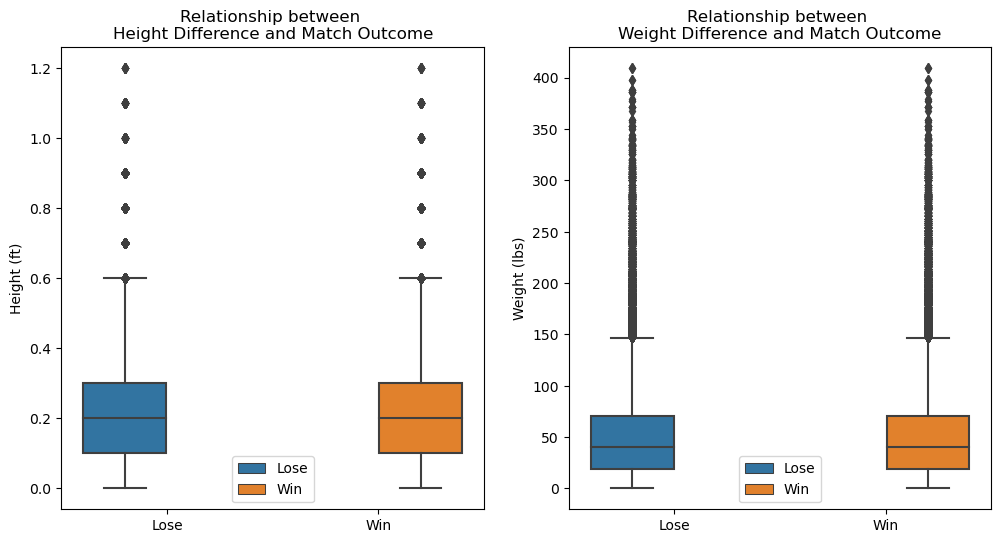

In [40]:
# create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# plot boxplots
sns.boxplot(x='r1_win', y='height_diff_calc_drop', hue='r1_win', data=df, ax=ax1)
sns.boxplot(x='r1_win', y='weight_diff_calc_drop', hue='r1_win', data=df, ax=ax2)

# set plot titles, labels, and tick labels
ax1.set_title('Relationship between \nHeight Difference and Match Outcome')
ax2.set_title('Relationship between \nWeight Difference and Match Outcome')

for ax in [ax1, ax2]:
    ax.set_xlabel('')
    ax.set_ylabel('Height (ft)' if ax == ax1 else 'Weight (lbs)')
    ax.legend(title='Match Outcome', loc='best')

    # change legend labels
    handles, labels = ax.get_legend_handles_labels()
    labels = ['Win' if label == '1' else 'Lose' for label in labels]
    ax.legend(handles, labels, loc='best')

    ax.set_xticklabels(['Lose', 'Win'])

# display plot
plt.show();

#### Match Win Analysis Dashboard by Wrestler Demographics 

This dashboard displays two bar charts that show match win probabilities based on wrestler's age and home country. The X-axis represents the wrestler's age and home country, while the y-axis represents the match win probabilities. The dotted lines represent the 50% match win probabilities. The chart by age shows that younger wrestlers have a higher chance of winning, particularly up to the age of 24, with a slight decline in win probabilities as the wrestler ages. On the other hand, there doesn't seem to be any correlation between home country and the match outcome. The chart is sorted by the highest number of wrestlers from the left, with Japan being the top country, but with win probabilities just below 50%. Other countries such as Mongolia, USA, Bulgaria, Estonia, Egypt, Western Samoa, and Kazakhstan had higher win probabilities. In summary, there are no strong correlations between home country and the match outcome.

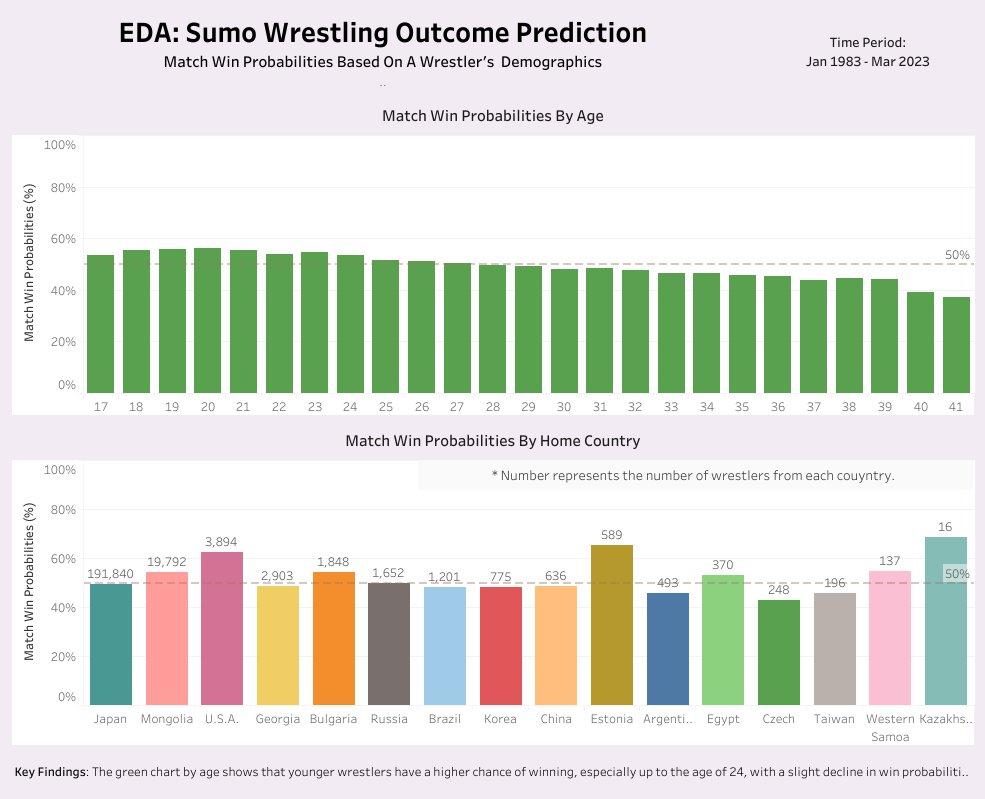

#### Match Win Analysis Dashboard by Sumo Ranks

This dashboard features two bar charts that display match win probabilities based on a wrestler's rank in the previous and current tournament. The X-axis represents the wrestler's rank, while the y-axis represents the match win probabilities. The data suggests a correlation between ranks and match outcome, with higher-ranked wrestlers having a greater likelihood of winning matches. This effect is particularly pronounced for wrestlers in the Yokozuna, Ozeki, and Sekiwake ranks.

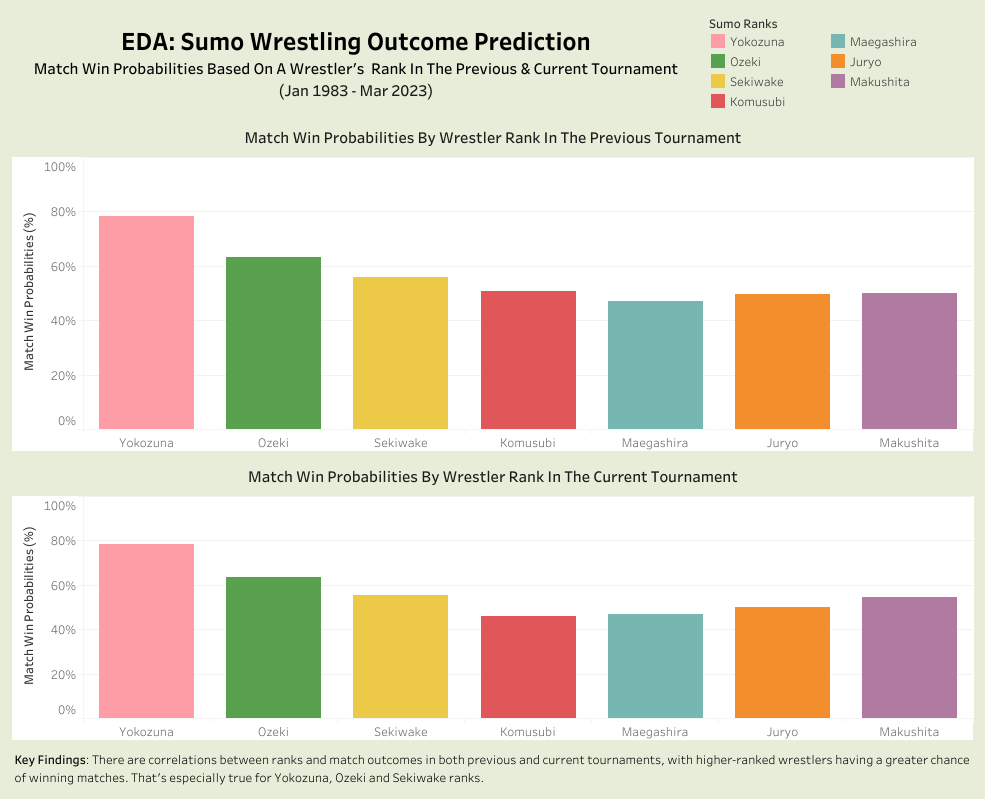

#### Match Win Analysis Dashboard by Number of Wins

This dashboard displays two bar charts showing the relationship between the wrestler's number of wins and match win probabilities in both the current and previous tournament. The X-axis represents the number of wins while the y-axis represents the match win probabilities. The data reveals a correlation between the number of wins and match outcome, with a particularly strong correlation observed in the current tournament. Interestingly, the chart shows a higher probability of winning matches with 7 wins compared to 8 wins. In sumo wrestling, winning 8 matches is an important achievement for maintaining or improving the wrestler's rank. Therefore, wrestlers who have already won 7 matches may have a higher sense of urgency and motivation to win their 8th match, leading to a slightly lower win probability compared to those with 7 wins.

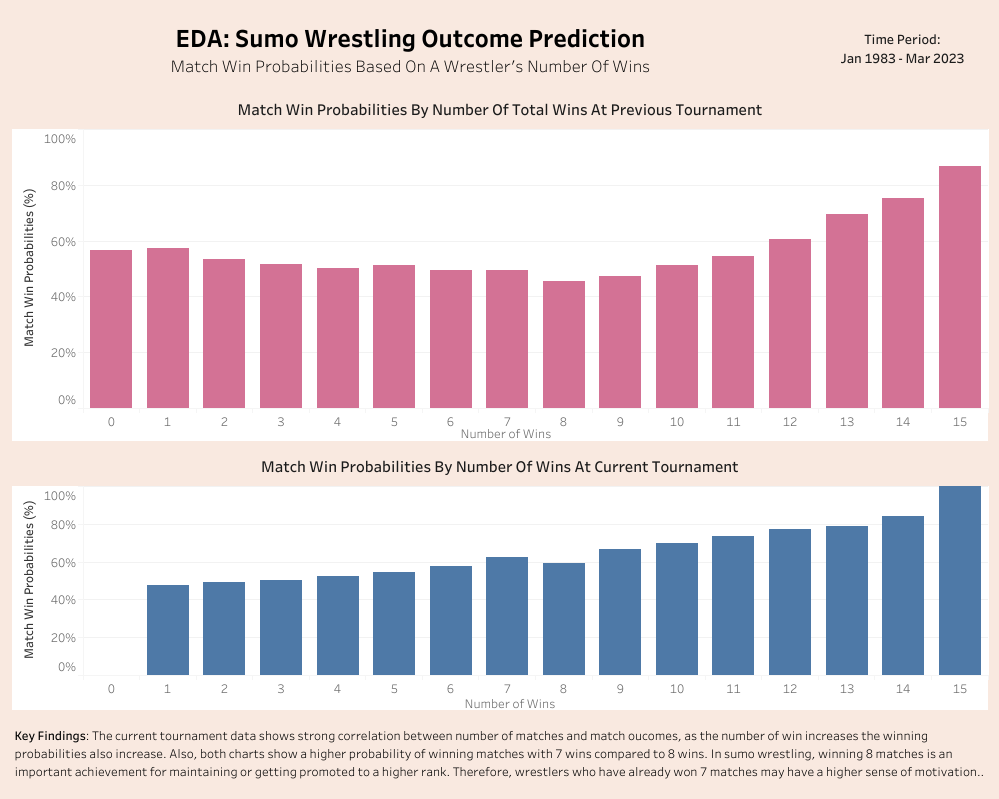

### Drop unnecessary columns 

After EDA, unnecessary columns for data modeling were dropped and a new CSV file was saved. 

In [41]:
df.head(2)

,basho,day,r1_id,r1_rank,r1_shikona,r1_result,r1_win,kimarite,r2_id,r2_rank,r2_shikona,r2_result,r1_heya,r1_shusshin,r1_birth_date,r1_height,r1_weight,r1_prev,r1_prev_w,r1_prev_l,r2_heya,r2_shusshin,r2_birth_date,r2_height,r2_weight,r2_prev,r2_prev_w,r2_prev_l,r1_Japan_hometown_calc,r2_Japan_hometown_calc,r1_age_calc,r2_age_calc,r1_height_ft,r2_height_ft,r1_weight_lbs,r2_weight_lbs,height_diff_calc_drop,weight_diff_calc_drop,age_diff_calc_drop,height_diff_calc,weight_diff_calc,r1_rank_simple_drop,r2_rank_simple_drop,r1_prev_drop,r2_prev_drop,r1_rank_curr_calc,r2_rank_curr_calc,r1_rank_prev_calc,r2_rank_prev_calc,r1_rank_changes_calc,r2_rank_changes_calc,r1_prev_win_pct_calc,r2_prev_win_pct_calc,r1_result_all,r2_result_all,r1_curr_win_pct_calc,r2_curr_win_pct_calc,r1_now_win_pct_calc,r2_now_win_pct_calc,r1_now_w_calc,r1_now_l_calc,r2_now_w_calc,r2_now_l_calc,r1_curr_w_calc,r1_curr_l_calc,r2_curr_w_calc,r2_curr_l_calc,r1_heya_calc,r2_heya_calc,kimarite_calc
0,1983-01-01,1,4140,J13w,Chikubayama,0-1,0,yorikiri,4306,Ms1e,Ofuji,1-0,Miyagino,Fukuoka,1957-08-21,175.5,115.0,Ms4e,4.0,3.0,Kokonoe,Tokyo,1958-08-26,193.5,145.0,Ms4w,4.0,3.0,1,1,25,24,5.8,6.3,254.0,320.0,0.5,66.0,1,32.0,170.0,J13,Ms1,Ms4,Ms4,33,1,4,4,2,0,0.571429,0.571429,7-8,6-1,0.466667,0.857143,0.000000,1.0,0,1,1,0,7,8,6,1,1,0,5
1,1983-01-01,3,1337,J12w,Tochitsukasa,1-2,0,yorikiri,4306,Ms1e,Ofuji,2-0,Kasugano,Aichi,1958-04-25,178.5,130.0,Ms5e,5.0,2.0,Kokonoe,Tokyo,1958-08-26,193.5,145.0,Ms4w,4.0,3.0,1,1,24,24,5.9,6.3,287.0,320.0,0.4,33.0,0,35.0,185.0,J12,Ms1,Ms5,Ms4,32,1,5,4,2,0,0.714286,0.571429,9-6,6-1,0.600000,0.857143,0.333333,1.0,1,2,2,0,9,6,6,1,1,0,5


In [42]:
# Select columns that have objects data types 
df.select_dtypes('object').columns

Index(['r1_rank', 'r1_shikona', 'r1_result', 'kimarite', 'r2_rank',
       'r2_shikona', 'r2_result', 'r1_heya', 'r1_shusshin', 'r1_prev',
       'r2_heya', 'r2_shusshin', 'r2_prev', 'r1_rank_simple_drop',
       'r2_rank_simple_drop', 'r1_prev_drop', 'r2_prev_drop', 'r1_result_all',
       'r2_result_all', 'r1_now_w_calc', 'r1_now_l_calc', 'r2_now_w_calc',
       'r2_now_l_calc', 'r1_curr_w_calc', 'r1_curr_l_calc', 'r2_curr_w_calc',
       'r2_curr_l_calc'],
      dtype='object')

In [43]:
# Drop unnecessary/duplicates columns 
df.drop(columns = ['day', 'r1_shikona', 'kimarite', 'r2_shikona', 
                   'r1_heya', 'r2_heya', 'r1_shusshin', 
                   'r2_shusshin', 'basho', 'r1_birth_date', 
                   'r2_birth_date', 'r1_rank', 'r2_rank',
                   'r1_prev', 'r2_prev', 'r1_rank_simple_drop', 'r2_rank_simple_drop', 
                   'r1_prev_drop', 'r2_prev_drop',
                   'r1_result_all', 'r2_result_all', 'r1_result', 'r2_result', 
                   'r1_height_ft', 'r2_height_ft','r1_weight_lbs', 'r2_weight_lbs', 
                   'height_diff_calc_drop', 'weight_diff_calc_drop', 'age_diff_calc_drop'
                  ], inplace=True)


### Save updated dataframe as csv file 

In [44]:
# Save dataset in csv file 
df.to_csv('../data/sumo_v3_eda_completed.csv', index=False)

In [45]:
# Presentation charts colors 
#49a3a5, #a5d7d9, #e4f3f5, #ffe689, #f0603c, #d74127